In [71]:
import pandas as pd
import matplotlib.pyplot as plt

df_2019 = pd.read_excel('/content/Аналитик инфляция.xlsx', sheet_name='сентябрь 2019 (задание 1)')
df_2020 = pd.read_excel('/content/Аналитик инфляция.xlsx', sheet_name='сентябрь 2020 (задание 1)')

In [72]:
#Посмотрим на общюю информацию о таблицах
print(df_2019.info())
print(df_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13758 entries, 0 to 13757
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Код                      13755 non-null  object
 1   Количество               13745 non-null  object
 2   Стоимость продаж (руб.)  13756 non-null  object
dtypes: object(3)
memory usage: 322.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16201 entries, 0 to 16200
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Код                      16198 non-null  object
 1   Количество               16195 non-null  object
 2   Стоимость продаж (руб.)  16199 non-null  object
dtypes: object(3)
memory usage: 379.8+ KB
None


In [73]:
#Уберём пустые значения из данных
df_2019_new = df_2019.dropna()
df_2020_new = df_2020.dropna()

In [74]:
# Создаем копии DataFrame перед изменениями
df_2019_new = df_2019_new.copy()
df_2020_new = df_2020_new.copy()

# Приводим строки с ценами и количеством товаров к числовому формату
df_2019_new['Стоимость продаж (руб.)'] = df_2019_new['Стоимость продаж (руб.)'].astype(float)
df_2020_new['Стоимость продаж (руб.)'] = df_2020_new['Стоимость продаж (руб.)'].astype(float)
df_2019_new['Количество'] = df_2019_new['Количество'].astype(float)
df_2020_new['Количество'] = df_2020_new['Количество'].astype(float)

# Рассчитываем стоимость на единицу товара
df_2019_new['Стоимость на единицу (2019)'] = df_2019_new['Стоимость продаж (руб.)'] / df_2019_new['Количество']
df_2020_new['Стоимость на единицу (2020)'] = df_2020_new['Стоимость продаж (руб.)'] / df_2020_new['Количество']

# Оставляем только буквы и цифры в коде товара
df_2019_new['Код'] = df_2019_new['Код'].str.replace(r'[^a-zA-Zа-яА-Я0-9]', '', regex=True)
df_2020_new['Код'] = df_2020_new['Код'].str.replace(r'[^a-zA-Zа-яА-Я0-9]', '', regex=True)

#Соединим 2 таблицы по Коду товара
merged_df = pd.merge(df_2019_new[['Код', 'Стоимость на единицу (2019)']],
                     df_2020_new[['Код', 'Стоимость на единицу (2020)']],
                     on='Код')

# Преобразуем все числовые данные в абсолютные значения (если вдруг такие имеются)
merged_df[['Стоимость на единицу (2019)', 'Стоимость на единицу (2020)']] = merged_df[['Стоимость на единицу (2019)', 'Стоимость на единицу (2020)']].abs()

# Рассчитываем инфляцию для каждого товара
merged_df['Инфляция (%)'] = ((merged_df['Стоимость на единицу (2020)'] - merged_df['Стоимость на единицу (2019)']) /
                             merged_df['Стоимость на единицу (2019)']) * 100


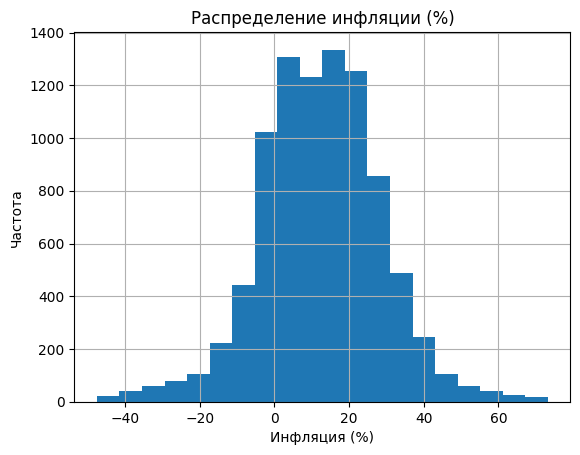

In [75]:
import matplotlib.pyplot as plt

# Построение гистограммы
filtered_df['Инфляция (%)'].hist(bins=20)

# Добавление заголовка и подписей осей
plt.title('Распределение инфляции (%)')
plt.xlabel('Инфляция (%)')
plt.ylabel('Частота')

# Отображение графика
plt.show()

In [76]:
# Т.к. распреление близко к нормальному применение правила трех сигм для рассчета среднего значения инфляции.
mean_sales = merged_df['Инфляция (%)'].mean()
std_sales = merged_df['Инфляция (%)'].std()

lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales

# Отфильтруем данные согласно правилу 3х сигм
filtered_df = merged_df[(merged_df['Инфляция (%)'] >= lower_bound) & (merged_df['Инфляция (%)'] <= upper_bound)]

print("Средняя инфляция:", filtered_df['Инфляция (%)'].mean().round(2))

Средняя инфляция: 12.51
